In [18]:

from langgraph.graph import START,END,StateGraph
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [19]:
model=ChatGroq(model="openai/gpt-oss-20b")

In [20]:
class LLMstate(TypedDict):
    question:str
    answer:str


In [21]:
def llm_node(state:LLMstate)->LLMstate:
    question=state["question"]
    prompt=f'Answer the following question {question}'
    answer = model.invoke(prompt).content
    state['answer'] = answer
    return state

In [22]:
graph=StateGraph(LLMstate)
#adding the node 
graph.add_node("llm_node",llm_node)

# adding the edges
graph.add_edge(START,"llm_node")
graph.add_edge("llm_node",END)
workflow=graph.compile()


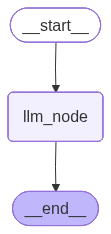

In [23]:
workflow


In [28]:
inital_state={"question":"what is the capital of france?"}
final_state=workflow.invoke(inital_state)

In [29]:
final_state

{'question': 'what is the capital of france?',
 'answer': 'The capital of France is **Paris**.'}